In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import sklearn
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Set the random seed, number of estimators
# and the "step factor" used to plot the graph of MSE
# for each method
random_state = 42
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 200
step_factor = 10
axis_step = int(n_estimators/step_factor)


In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [4]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Pre-create the arrays which will contain the MSE for
# each particular ensemble method
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

In [7]:
# Estimate the Bagging MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 10 of 200...
Bagging Estimator: 20 of 200...
Bagging Estimator: 30 of 200...
Bagging Estimator: 40 of 200...
Bagging Estimator: 50 of 200...
Bagging Estimator: 60 of 200...
Bagging Estimator: 70 of 200...
Bagging Estimator: 80 of 200...
Bagging Estimator: 90 of 200...
Bagging Estimator: 100 of 200...
Bagging Estimator: 110 of 200...
Bagging Estimator: 120 of 200...
Bagging Estimator: 130 of 200...
Bagging Estimator: 140 of 200...
Bagging Estimator: 150 of 200...
Bagging Estimator: 160 of 200...
Bagging Estimator: 170 of 200...
Bagging Estimator: 180 of 200...
Bagging Estimator: 190 of 200...
Bagging Estimator: 200 of 200...


In [8]:
# Estimate the Random Forest MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Random Forest Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    rf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, rf.predict(X_test))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

Random Forest Estimator: 10 of 200...
Random Forest Estimator: 20 of 200...
Random Forest Estimator: 30 of 200...
Random Forest Estimator: 40 of 200...
Random Forest Estimator: 50 of 200...
Random Forest Estimator: 60 of 200...
Random Forest Estimator: 70 of 200...
Random Forest Estimator: 80 of 200...
Random Forest Estimator: 90 of 200...
Random Forest Estimator: 100 of 200...
Random Forest Estimator: 110 of 200...
Random Forest Estimator: 120 of 200...
Random Forest Estimator: 130 of 200...
Random Forest Estimator: 140 of 200...
Random Forest Estimator: 150 of 200...
Random Forest Estimator: 160 of 200...
Random Forest Estimator: 170 of 200...
Random Forest Estimator: 180 of 200...
Random Forest Estimator: 190 of 200...
Random Forest Estimator: 200 of 200...


In [9]:
# Estimate the AdaBoost MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Boosting Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    boosting = AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
    boosting.fit(X_train, y_train)
    mse = mean_squared_error(y_test, boosting.predict(X_test))
    estimators[i] = step_factor*(i+1)
    boosting_mse[i] = mse

Boosting Estimator: 10 of 200...
Boosting Estimator: 20 of 200...
Boosting Estimator: 30 of 200...
Boosting Estimator: 40 of 200...
Boosting Estimator: 50 of 200...
Boosting Estimator: 60 of 200...
Boosting Estimator: 70 of 200...
Boosting Estimator: 80 of 200...
Boosting Estimator: 90 of 200...
Boosting Estimator: 100 of 200...
Boosting Estimator: 110 of 200...
Boosting Estimator: 120 of 200...
Boosting Estimator: 130 of 200...
Boosting Estimator: 140 of 200...
Boosting Estimator: 150 of 200...
Boosting Estimator: 160 of 200...
Boosting Estimator: 170 of 200...
Boosting Estimator: 180 of 200...
Boosting Estimator: 190 of 200...
Boosting Estimator: 200 of 200...


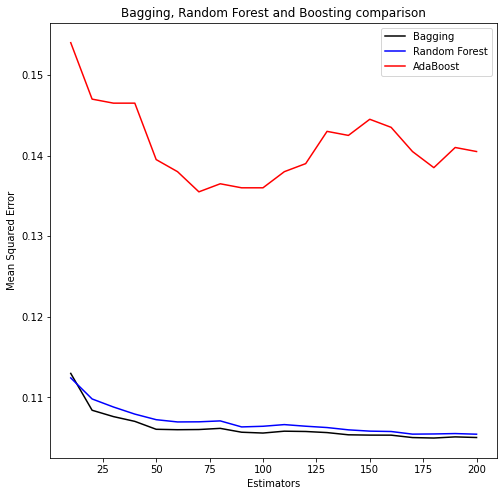

In [10]:
# Plot the chart of MSE versus number of estimators
plt.figure(figsize=(8, 8))
plt.title('Bagging, Random Forest and Boosting comparison')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()